# chapter 14: 輪郭
---

# cv2.findContoursで輪郭抽出をやってみる

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

テスト用の画像を作る

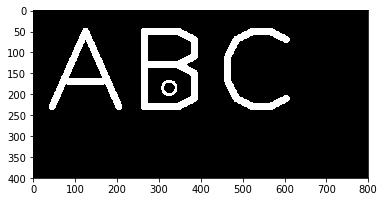

In [2]:
# 真っ黒な画像を作る
img = np.zeros((400, 800, 3), dtype=np.uint8)

# 画像の上に "ABC" という文字列を書く
cv2.putText(img, 'ABC', (25, 250), cv2.FONT_HERSHEY_PLAIN, 
            20.0, (255, 255, 255), 15)

# "B" の中に丸を打つ
cv2.circle(img, (325, 185), 16, (255, 255, 255), 6);

plt.imshow(img, cmap='gray');

輪郭を探す

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im2, contours, hierarchy = cv2.findContours(img_gray, 
                                            cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_NONE)

輪郭を描画する

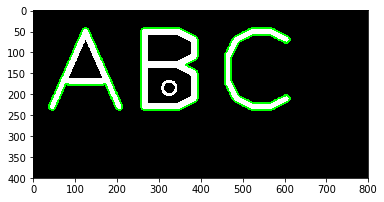

In [4]:
img_out = img.copy()
cv2.drawContours(img_out, contours, -1, (0, 255, 0), 3)

plt.imshow(img_out, cmap='gray');

# mode引数の違いについて

* `cv2.RETR_EXTERNAL`: 最も外側の輪郭のみを取り出す
* `cv2.RETR_CCOMP`: すべての輪郭を取り出し，外側と内側の穴の2階層にわける
* `cv2.RETR_TREE`: すべての輪郭を取り出し，輪郭の階層構造を全部作る

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, contours_external, hierarchy_external = cv2.findContours(img_gray, 
                                                            cv2.RETR_EXTERNAL, 
                                                            cv2.CHAIN_APPROX_NONE)

_, contours_ccomp, hierarchy_ccomp = cv2.findContours(img_gray, 
                                                      cv2.RETR_CCOMP, 
                                                      cv2.CHAIN_APPROX_NONE)

_, contours_tree, hierarchy_tree = cv2.findContours(img_gray,
                                                    cv2.RETR_TREE, 
                                                    cv2.CHAIN_APPROX_NONE)


抽出した輪郭を描く．

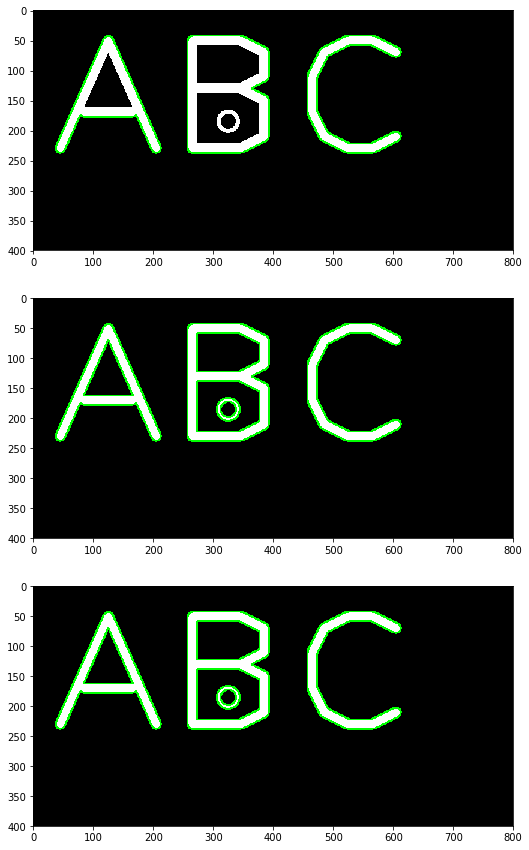

In [6]:
img_out_external = img.copy()
img_out_ccomp = img.copy()
img_out_tree = img.copy()

cv2.drawContours(img_out_external, contours_external, -1, (0, 255, 0), 2)
cv2.drawContours(img_out_ccomp, contours_ccomp, -1, (0, 255, 0), 2)
cv2.drawContours(img_out_tree, contours_tree, -1, (0, 255, 0), 2)

plt.figure(figsize=(20, 15))
plt.subplot(311), plt.imshow(img_out_external);
plt.subplot(312), plt.imshow(img_out_ccomp);
plt.subplot(313), plt.imshow(img_out_tree);

CCOMPとTREEは描画結果は同じだが階層構造の表現が異なる．

In [7]:
hierarchy_external

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

In [8]:
hierarchy_tree

array([[[ 1, -1, -1, -1],
        [ 6,  0,  2, -1],
        [ 5, -1,  3,  1],
        [-1, -1,  4,  2],
        [-1, -1, -1,  3],
        [-1,  2, -1,  1],
        [-1,  1,  7, -1],
        [-1, -1, -1,  6]]], dtype=int32)

In [9]:
hierarchy_ccomp

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 3,  0, -1, -1],
        [ 6,  2,  4, -1],
        [ 5, -1, -1,  3],
        [-1,  4, -1,  3],
        [-1,  3,  7, -1],
        [-1, -1, -1,  6]]], dtype=int32)

# method引数: 輪郭の近似方法

* `cv2.CHAIN_APPROX_NONE`: 近似せずに全ての点を保持
* `cv2.CHAIN_APPROX_SIMPLE`: 水平，垂直，斜めの部分を圧縮して短点のみを保持

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, contours_none, hierarchy_none = cv2.findContours(img_gray, 
                                                    cv2.RETR_EXTERNAL, 
                                                    cv2.CHAIN_APPROX_NONE)

_, contours_simple, hierarchy_simple = cv2.findContours(img_gray, 
                                                        cv2.RETR_EXTERNAL, 
                                                        cv2.CHAIN_APPROX_SIMPLE)


抽出した輪郭を描く．結果はどっちもほぼ同じ．

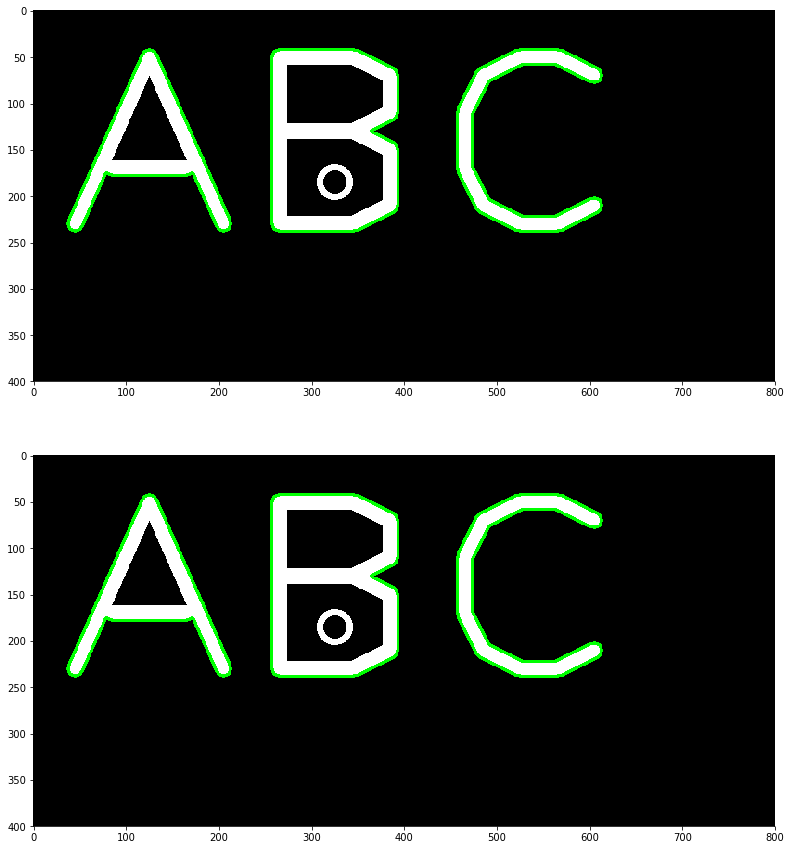

In [11]:
img_out_none = img.copy()
img_out_simple = img.copy()

cv2.drawContours(img_out_none, contours_none, -1, (0, 255, 0), 2)
cv2.drawContours(img_out_simple, contours_simple, -1, (0, 255, 0), 2)

plt.figure(figsize=(20, 15))
plt.subplot(211), plt.imshow(img_out_none);
plt.subplot(212), plt.imshow(img_out_simple);

点の数を比べてみる

In [12]:
print('CHAIN_APPROX_NONE -----------')
for contour in contours_none:
    print(contour.shape)

print('CHAIN_APPROX_SIMPLE -----------')
for contour in contours_simple:
    print(contour.shape)

CHAIN_APPROX_NONE -----------
(800, 1, 2)
(628, 1, 2)
(628, 1, 2)
CHAIN_APPROX_SIMPLE -----------
(492, 1, 2)
(171, 1, 2)
(477, 1, 2)


# 輪郭に対してさらに何かする

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, contours, hierarchy = cv2.findContours(img_gray, 
                                          cv2.RETR_EXTERNAL, 
                                          cv2.CHAIN_APPROX_NONE)

3つ出てくる輪郭は，C, B, Aの順番になってる

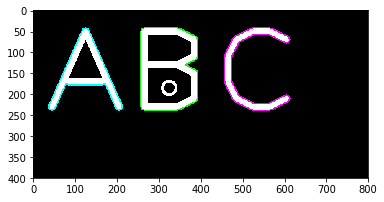

In [14]:
img_out = img.copy()

# 輪郭ごとに色を変えて描画
cv2.drawContours(img_out, contours, 0, (255, 0, 255), 2)
cv2.drawContours(img_out, contours, 1, (0, 255, 0), 2)
cv2.drawContours(img_out, contours, 2, (0, 255, 255), 2)

plt.imshow(img_out);

## 輪郭の長さを計算する

In [15]:
for k, contour in enumerate(contours):
    print('contours[{0}]: {1}'.format(k, cv2.arcLength(contour, closed=True)))

contours[0]: 909.3523740768433
contours[1]: 666.9360725879669
contours[2]: 730.7249574661255


# 輪郭のBounding Boxを計算する

戻り値は (x, y, width, height)

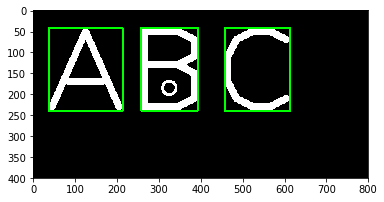

In [16]:
img_out = img.copy()

for k, contour in enumerate(contours):
    bbox = cv2.boundingRect(contour)
    x, y, w, h = bbox
    
    cv2.rectangle(img_out, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(img_out)

輪郭に楕円をフィッティングする

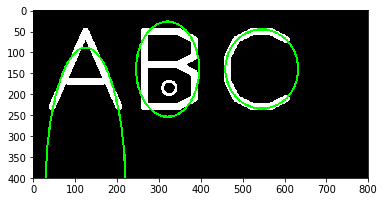

In [17]:
img_out = img.copy()

for k, contour in enumerate(contours):
    ellipse = cv2.fitEllipse(contour)
    
    cv2.ellipse(img_out, ellipse, (0, 255, 0), 3)

plt.imshow(img_out)